
$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

Let's first build a function to compute $sigmoid(x)$.

In [2]:
import math
import numpy as np

x = np.array([1, 2, 3])
# try to run this first line
#print(math.exp(x))
print(np.exp(x))


[ 2.71828183  7.3890561  20.08553692]


In [3]:
# using math package
def basic_sigmoid(x):
    return 1/(1+math.exp(-x))

basic_sigmoid(3)

0.9525741268224334

In [4]:
# using numpy package
def sigmoid(x):
    return 1/(1+np.exp(-x))

sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

In [5]:
# compute z for one element using loop
x = np.array([1, 2, 3])
w= np.array([0.5, 0.3, 0.2])
b = 0.4
z = b

for i in range(len(x)):
    z += x[i]*w[i]

print(z)

2.1


In [6]:
# compute the activation
a = sigmoid(z)
print(a)

0.8909031788043871


In [7]:
# compute the activation but using vectorize approach
sigmoid(np.dot(w.T, x) + b)

0.8909031788043871

Let's generalize the activation calculation to a set of elements (your training data) using vectorization

In [8]:
# build the X matrix with the right orientation (dimensions)
X = np.array([[1, 2, 3], [1.5, 3.1, 4], [5, 6, 3]]).T
print(X)

[[1.  1.5 5. ]
 [2.  3.1 6. ]
 [3.  4.  3. ]]


In [9]:
print("x(1,1) :",X[0,0])
print("x(2,3) :",X[1,2])

x(1,1) : 1.0
x(2,3) : 6.0


In [10]:
# check the shape of w.
w.shape# ===> but this is the dim we need (3 , 1)

(3,)

In [11]:
# use reshape to adjust the dimensions
w= w.reshape(len(w),1)

In [12]:
print("w dim: ", w.shape)
print("X dim: ", X.shape)

w dim:  (3, 1)
X dim:  (3, 3)


In [13]:
# compute Z of all elements
Z = np.dot(w.T, X) + b
print(Z)

[[2.1  2.88 5.3 ]]


In [14]:
Z.shape

(1, 3)

In [15]:
# compute activation of all elements
A = sigmoid(Z)
print(A)

[[0.89090318 0.94684886 0.9950332 ]]


Let's now compute the two versions of cost function:  
- Least square: $\text{Cost} =  \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$
- Log loos: $- \frac{1}{m} \sum_{i=1}^{m} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)$

In [16]:
# Y is the vector that contains the real values
Y = np.array([[1, 0, 1]])
print(Y.shape)

(1, 3)


In [17]:
D = A - Y
print(D)

[[-0.10909682  0.94684886 -0.0049668 ]]


In [18]:
# Least square
np.dot(D,D.T)

array([[0.90844956]])

In [19]:
np.sum(D*D)

0.9084495560178965

In [20]:
# log loss
m = Y.shape[1]

-1/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))



1.0183714979486944

Initial state of the params

In [21]:
print("W: ", w)
print("b: ", b)

W:  [[0.5]
 [0.3]
 [0.2]]
b:  0.4


Compute gradients:
- $w_j := w_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (a_i - y_i) x_{ij}$

- $b := b - \alpha \frac{1}{m} \sum_{i=1}^{m} (a_i - y_i)$


In [22]:
alpha = 0.01

In [23]:
delta_b = np.sum(A-Y)/m
delta_w = np.dot(X, (A-Y).T)/m

In [24]:
w - alpha * delta_w

array([[0.49571219],
       [0.29104254],
       [0.18851598]])

In [25]:
b - alpha * delta_b

0.3972240491974791

Create forward and Backward propagantion fronctions

In [26]:
def forward(w, b, X, Y):
  predictions = sigmoid(np.dot(w.T, X) + b)
  cost = -1/m * np.sum(Y*np.log(predictions) + (1-Y)*np.log(1-predictions))
  return predictions, cost

In [1]:
def backward(w, b, X, Y, A):
  m = X.shape[1]  # number of examples
  delta_w = np.dot(X, (A - Y).T) / m
  delta_b = np.sum(A - Y) / m
  new_w = w - alpha * delta_w
  new_b = b - alpha * delta_b
  return new_w, new_b

In [27]:
w

array([[0.5],
       [0.3],
       [0.2]])

In [30]:
# run a loop of 100 steps using backward and forward and plot the cost function
w_it=np.random.rand(3,1)
b_it=0
cost_values = []
alpha = 0.01
for i in range(1000):
  predictions, cost = forward(w_it, b_it, X, Y)
  w_it, b_it = backward(w_it, b_it, X, Y, predictions)
  cost_values.append(cost)

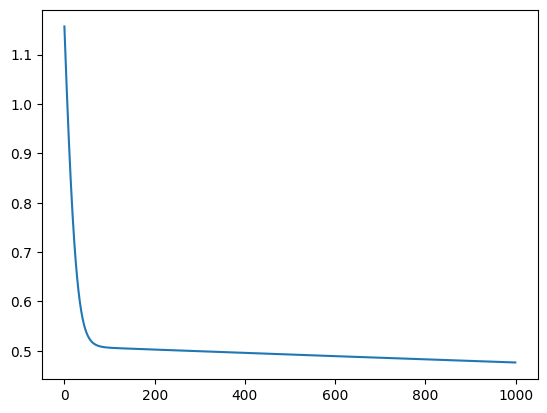

In [31]:
#plot cost_values
import matplotlib.pyplot as plt
plt.plot(cost_values)